# Anna Clara de Andrada

## What are the main factors that help determine a country's happiness score?

### As an international student from Brazil who has also lived in Canada and in the United States during the past 3 years, I am very interested in such dynamics. Does financial prosperity or governmental support play a role on the average citizen's life satisfaction? Lately, the idea that a functioning market brings happiness to all is coming into scrutiny as prices skyrocket and as populations start demanding more government support. It is of personal interest to observe this relationship so that we can understand what policies support a prosperous and happy society, and which ones don't. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

df1 = pd.read_csv('../data/raw/world_happiness_report.csv')

print(df1)


      Unnamed: 0  Happiness Rank      Country  \
0              0               1  Switzerland   
1              1               2      Iceland   
2              2               3      Denmark   
3              3               4       Norway   
4              4               5       Canada   
...          ...             ...          ...   
1224         141             142    Botswana*   
1225         142             143      Rwanda*   
1226         143             144     Zimbabwe   
1227         144             145      Lebanon   
1228         145             146  Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               ...             ...   
1224        

In [3]:
import matplotlib.pylab as plt
import seaborn as sns

number_of_rows_and_columns = df1.shape
first_five_rows = df1.head()
column_names = df1.columns


print(number_of_rows_and_columns)
print(first_five_rows)
print(column_names)


(1229, 12)
   Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freedom Trust (Government Corruption) Gene

In [4]:
unique_values = df1.nunique(axis=0)
print(unique_values)

'''this output showcases that the survey includes data for all countries (158 unique values
under 'Countries') in the international arena over a span of 8 years'''

Unnamed: 0                        158
Happiness Rank                    158
Country                           195
Region                             17
Happiness Score                  1131
Economy (GDP per Capita)         1150
Family (Social Support)          1133
Health (Life Expectancy)         1080
Freedom                          1053
Trust (Government Corruption)     952
Generosity                        979
Year                                8
dtype: int64


"this output showcases that the survey includes data for all countries (158 unique values\nunder 'Countries') in the international arena over a span of 8 years"

In [5]:
print(df1['Country'].unique())

print(df1['Region'].unique())

''' to show which countries and regions are being analyzed. 
This showcases that there are some countries that are assigned a '*', and some 
regions are null: '-'

'''

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

" to show which countries and regions are being analyzed. \nThis showcases that there are some countries that are assigned a '*', and some \nregions are null: '-'\n\n"

In [6]:
df2 = df1[df1.Region != '-']
print(df2)

'''to delete all instances where region is null'''

      Unnamed: 0  Happiness Rank       Country  \
0              0               1   Switzerland   
1              1               2       Iceland   
2              2               3       Denmark   
3              3               4        Norway   
4              4               5        Canada   
...          ...             ...           ...   
1221         138             139      Tanzania   
1222         139             140  Sierra Leone   
1226         143             144      Zimbabwe   
1227         144             145       Lebanon   
1228         145             146   Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               ...             ...   


'to delete all instances where region is null'

In [7]:
print(df1['Year'].unique())

'''This analysis showcases the timespan for which we can analyze trends'''

[2015 2016 2017 2018 2019 2020 2021 2022]


'This analysis showcases the timespan for which we can analyze trends'

In [8]:
check_nan = df1.isnull().values.any()
print(check_nan)

''' to ensure there are no NaN values in our dataset to be cleaned'''

False


' to ensure there are no NaN values in our dataset to be cleaned'

In [9]:
df3= df2.drop(df1.columns[0], axis=1)
print(df2.shape)

'''to drop Unnamed column and ensure the column has been deleted'''

(1183, 12)


'to drop Unnamed column and ensure the column has been deleted'

In [10]:
df4 = df3[df3.Year != 2022]
print(df4)

      Happiness Rank      Country              Region Happiness Score  \
0                  1  Switzerland      Western Europe           7.587   
1                  2      Iceland      Western Europe           7.561   
2                  3      Denmark      Western Europe           7.527   
3                  4       Norway      Western Europe           7.522   
4                  5       Canada       North America           7.427   
...              ...          ...                 ...             ...   
1078             145      Lesotho  Sub-Saharan Africa           3.512   
1079             146     Botswana  Sub-Saharan Africa           3.467   
1080             147       Rwanda  Sub-Saharan Africa           3.415   
1081             148     Zimbabwe  Sub-Saharan Africa           3.145   
1082             149  Afghanistan          South Asia           2.523   

     Economy (GDP per Capita) Family (Social Support)  \
0                     1.39651                 1.34951   
1        

In [11]:
df5 = df4.transform(pd.to_numeric, errors='coerce')

'''to transform variables in dataframe to numeric in order to apply the describe function 
efficiently and to build visualizations on the data'''
df5.describe()

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,1064.000000,0.0,0.0,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,77.790414,NaN,NaN,5.418920,0.919224,1.050222,0.613049,0.430625,0.127485,0.208952,2017.967105
std,44.819322,NaN,NaN,1.119277,0.399295,0.332545,0.247509,0.152321,0.108336,0.118013,2.011222
min,1.000000,NaN,NaN,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,NaN,NaN,4.571000,0.618450,0.840197,0.439750,0.329094,0.055000,0.121900,2016.000000
50%,78.000000,NaN,NaN,5.387500,0.983096,1.081475,0.644974,0.448440,0.092850,0.195977,2018.000000
75%,117.000000,NaN,NaN,6.224075,1.241105,1.311449,0.800467,0.552335,0.160568,0.266000,2020.000000
max,158.000000,NaN,NaN,7.842000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075,2021.000000


In [12]:
df6 = df4['Happiness Score'].transform(pd.to_numeric, errors='coerce')
df6.describe()

count    1064.000000
mean        5.418920
std         1.119277
min         2.523000
25%         4.571000
50%         5.387500
75%         6.224075
max         7.842000
Name: Happiness Score, dtype: float64

In [13]:
df7 = df4['Economy (GDP per Capita)'].transform(pd.to_numeric, errors='coerce')
df7.describe()

count    1064.000000
mean        0.919224
std         0.399295
min         0.000000
25%         0.618450
50%         0.983096
75%         1.241105
max         1.870766
Name: Economy (GDP per Capita), dtype: float64

In [14]:
df6 = df5.drop(['Country', 'Region'], axis=1)
''' I have dropped Country and Region columns as I am interested in observig only the relationship between 
the numeric variables in our dataset to answer my specific research question'''

' I have dropped Country and Region columns as I am interested in observig only the relationship between \nthe numeric variables in our dataset to answer my specific research question'

' this visulization does a great job at pinpointing some of the strongest correlations in our dataset. \nOne of the strongest corelations, at 0.79, is between GDP per capita and happiness score '

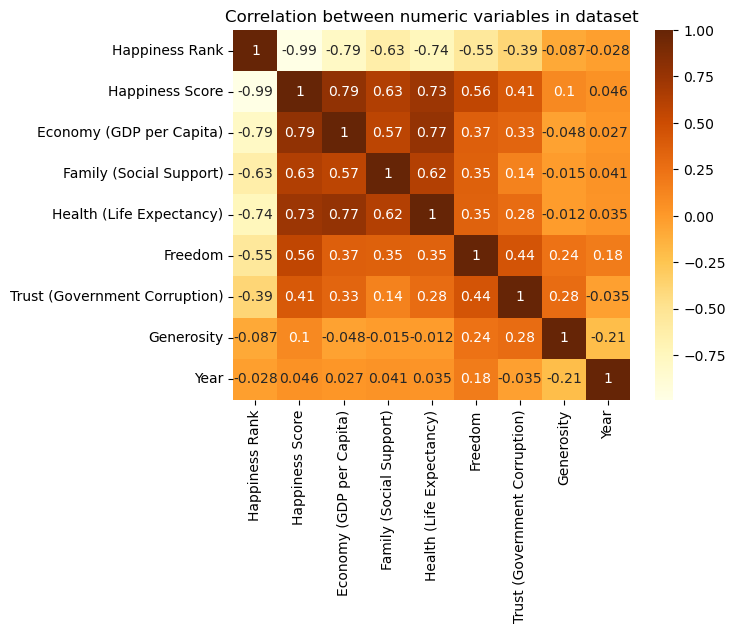

In [15]:
dr = df6.copy()
data_raw_mx = df6.corr()
sns.heatmap(data_raw_mx, annot=True, cmap='YlOrBr')
plt.title("Correlation between numeric variables in dataset")

''' this visulization does a great job at pinpointing some of the strongest correlations in our dataset. 
One of the strongest corelations, at 0.79, is between GDP per capita and happiness score '''

In [77]:
import matplotlib.pyplot as plt 

In [17]:
df6.to_csv('../data/processed/world_happiness_report_processed_Notebook1.csv')
'''to save cleaned dataset into processed folder'''

'to save cleaned dataset into processed folder'

'these four plots were showcased together as they share the same y-axis: "Happiness Score". As observed in the correlation matrix: GDP, Social Support, Life expectancy and Freedom were the variables that showcased the strongest correlation to Happiness Score. This visualization reinforces what we saw in the correlation matrix, as the graph showcasing the relationship between GDP and Happiness, as a strong linear positive correlation with fewer outliers. '

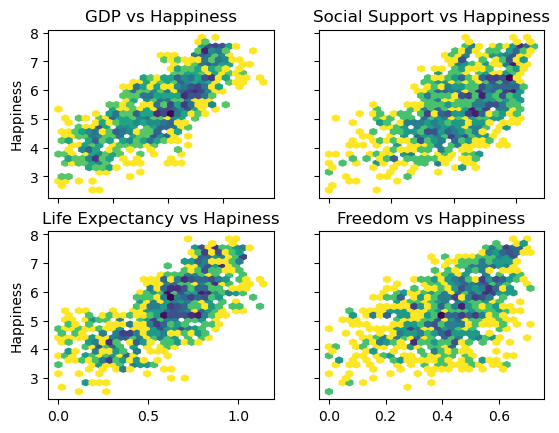

In [18]:
x1=df6["Economy (GDP per Capita)"]
y1=df6["Happiness Score"]
x2=df6["Family (Social Support)"]
y2=df6["Happiness Score"]
x3=df6["Health (Life Expectancy)"]
y3=df6["Happiness Score"]
x4=df6["Freedom"]
y4=df6["Happiness Score"]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hexbin(x1, y1, gridsize=30, bins='log', cmap='viridis_r')
axs[0, 0].set_title('GDP vs Happiness')
axs[0, 1].hexbin(x2, y2, gridsize=30, bins='log', cmap='viridis_r')
axs[0, 1].set_title('Social Support vs Happiness')
axs[1, 0].hexbin(x3, y3, gridsize=30, bins='log', cmap='viridis_r')
axs[1, 0].set_title('Life Expectancy vs Hapiness')
axs[1, 1].hexbin(x4, y4 , gridsize=30, bins='log', cmap='viridis_r')
axs[1, 1].set_title('Freedom vs Happiness')

for ax in axs.flat:
    ax.set(ylabel="Happiness")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
     
'''these four plots were showcased together as they share the same y-axis: "Happiness Score". As observed in the correlation matrix: GDP, Social Support, Life expectancy and Freedom were the variables that showcased the strongest correlation to Happiness Score. This visualization reinforces what we saw in the correlation matrix, as the graph showcasing the relationship between GDP and Happiness, as a strong linear positive correlation with fewer outliers. '''

'from this plot, we can determine that the'

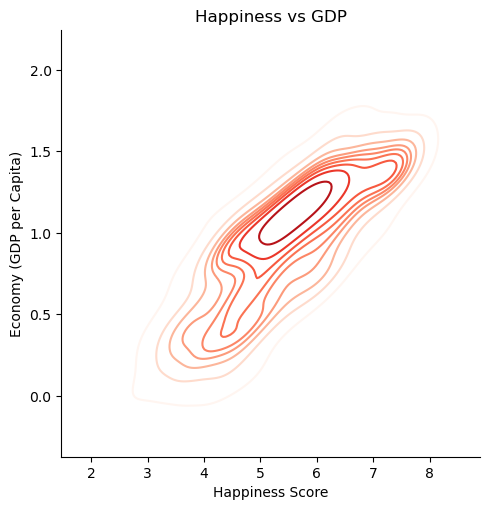

In [19]:
x1=df5["Happiness Score"]
y1=df5["Economy (GDP per Capita)"]
       
sns.displot(data=df5,x=x1, y=y1,kind='kde',cmap='Reds').set(title='Happiness vs GDP')

'''from this plot, we can determine that the'''

In [20]:
import pandas as pd
import numpy as np 

def load_and_process(url_or_path_to_csv_file):


    clean1 = (
        pd.read_csv('../data/raw/world_happiness_report.csv')
          .drop(clean1.Region == '-'))

    clean2 = (
        clean1.drop(clean1.Year == 2022)
           .drop(['Country', 'Region'], axis=1)
           .transform(pd.to_numeric, errors='coerce')
      )

    # Make sure to return the latest dataframe
    return clean2


In [21]:
top = np.percentile(df6["Happiness Score"],95)
bottom = np.percentile(df6["Happiness Score"],5)

In [ ]:
sns.barplot(
    x=df5['Happiness Score'], 
    y=df5['Economy (GDP per Capita)'], 
    data=df5,  
    ci=None, 
    palette='mako');

In [50]:
top = np.percentile(df6["Happiness Score"],95)
top = top + np.percentile(df6["Happiness Score"],5)

In [65]:
df6 = df5.drop(['Country','Region','Happiness Rank', 'Family (Social Support)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Year'], axis=1)
'''to drop all columns except for happiness score and GDP'''
df6.head()

,Happiness Score,Economy (GDP per Capita)
0,7.587,1.39651
1,7.561,1.30232
2,7.527,1.32548
3,7.522,1.45900
4,7.427,1.32629


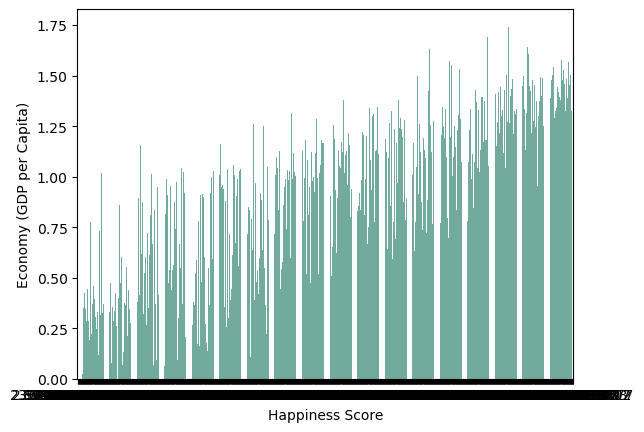

In [74]:
sns.barplot(
    x=df6['Happiness Score'], 
    y=df6['Economy (GDP per Capita)'], 
    data=df6,  
    ci=None, 
    color='#69b3a2');
